<a href="https://colab.research.google.com/github/maknoonisar/metaProphetModel/blob/main/april_dec24_complete_meta_prophetimplementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Python
import pandas as pd
from prophet import Prophet

In [ ]:
import pandas as pd

# Attempt to read the CSV file with a different encoding and skip bad lines
df = pd.read_csv('/content/Islamabad Daily Historical Data 2010 2022.csv', encoding='latin1', on_bad_lines='skip')
df.head()




,time,temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C)
0,2010-01-01T00:00,19.4,3.9,10.6,16.2,1.1,8.0
1,2010-01-02T00:00,18.3,4.1,10.7,15.5,1.2,8.2
2,2010-01-03T00:00,14.9,6.1,10.6,12.2,4.0,8.4
3,2010-01-04T00:00,16.7,4.2,9.6,13.3,1.8,7.1
4,2010-01-05T00:00,19.3,3.1,10.4,16.0,0.5,7.9


In [ ]:
# Display the first few rows to inspect the data
print(df.head())

# Display the shape of the dataframe to understand its structure
print(df.shape)

# Display the columns to check for any inconsistencies
print(df.columns)

               time  temperature_2m_max (°C)  temperature_2m_min (°C)  \
0  2010-01-01T00:00                     19.4                      3.9   
1  2010-01-02T00:00                     18.3                      4.1   
2  2010-01-03T00:00                     14.9                      6.1   
3  2010-01-04T00:00                     16.7                      4.2   
4  2010-01-05T00:00                     19.3                      3.1   

   temperature_2m_mean (°C)  apparent_temperature_max (°C)  \
0                      10.6                           16.2   
1                      10.7                           15.5   
2                      10.6                           12.2   
3                       9.6                           13.3   
4                      10.4                           16.0   

   apparent_temperature_min (°C)  apparent_temperature_mean (°C)  
0                            1.1                             8.0  
1                            1.2                      

               time  temperature_2m_max (°C)  temperature_2m_min (°C)  \
0  2010-01-01T00:00                     19.4                      3.9   
1  2010-01-02T00:00                     18.3                      4.1   
2  2010-01-03T00:00                     14.9                      6.1   
3  2010-01-04T00:00                     16.7                      4.2   
4  2010-01-05T00:00                     19.3                      3.1   

   temperature_2m_mean (°C)  apparent_temperature_max (°C)  \
0                      10.6                           16.2   
1                      10.7                           15.5   
2                      10.6                           12.2   
3                       9.6                           13.3   
4                      10.4                           16.0   

   apparent_temperature_min (°C)  apparent_temperature_mean (°C)  
0                            1.1                             8.0  
1                            1.2                      

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuij8egle/evy4cdev.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuij8egle/rnco1dgy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84778', 'data', 'file=/tmp/tmpuij8egle/evy4cdev.json', 'init=/tmp/tmpuij8egle/rnco1dgy.json', 'output', 'file=/tmp/tmpuij8egle/prophet_modelfaacsvl5/prophet_model-20240715054226.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:42:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:42:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Forecast results have been saved to '/content/2010-2022forecast_results.csv'


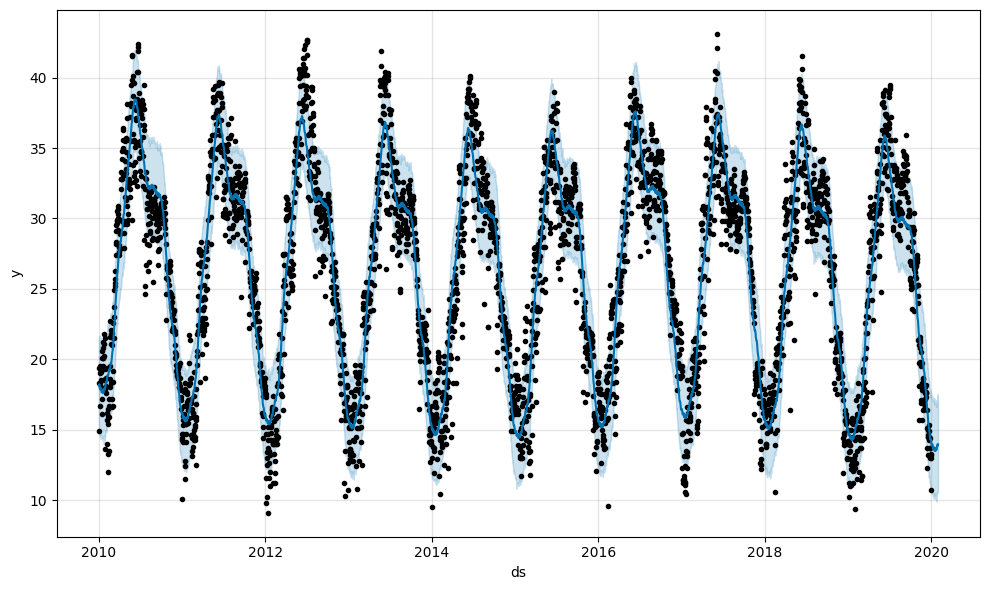

In [ ]:
import pandas as pd
from prophet import Prophet

# Load the data with a different encoding
df = pd.read_csv('/content/Islamabad Daily Historical Data 2010 2022.csv', delimiter=',', encoding='latin1', on_bad_lines='skip')

# Display the first few rows to inspect the data
print(df.head())

# Display the shape of the dataframe to understand its structure
print(df.shape)

# Display the columns to check for any inconsistencies
print(df.columns)

# Step 2: Prepare the Data
# Rename 'time' to 'ds' and select the 'temperature_2m_max (°C)' column as 'y'
df.rename(columns={'time': 'ds', 'temperature_2m_max (°C)': 'y'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds'])  # Convert the 'ds' column to datetime format

# Check the prepared data
print(df.head())

# Step 3: Fit the Model
m = Prophet()
m.fit(df[['ds', 'y']])

# Step 4: Make a Future DataFrame
future = m.make_future_dataframe(periods=30)  # Forecast for the next 30 days

# Step 5: Predict the Future
forecast = m.predict(future)

# Step 6: Plot the Forecast
fig = m.plot(forecast)
fig.show()

# Save the forecast results to a CSV file
forecast[['ds', 'yhat']].to_csv('/content/2010-2022forecast_results.csv', index=False)

# Print a message to indicate the file has been saved
print("Forecast results have been saved to '/content/2010-2022forecast_results.csv'")






INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuij8egle/skykygof.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuij8egle/67fxywdd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47187', 'data', 'file=/tmp/tmpuij8egle/skykygof.json', 'init=/tmp/tmpuij8egle/67fxywdd.json', 'output', 'file=/tmp/tmpuij8egle/prophet_modeld9vr7g7a/prophet_model-20240715061758.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:17:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:17:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


               time  temperature_2m_max (°C)  temperature_2m_min (°C)  \
0  2018-12-01T00:00                     20.1                     13.3   
1  2018-12-02T00:00                     20.1                     12.0   
2  2018-12-03T00:00                     18.3                      8.5   
3  2018-12-04T00:00                     18.8                     11.7   
4  2018-12-05T00:00                     18.8                     11.4   

   temperature_2m_mean (°C)  apparent_temperature_max (°C)  \
0                      15.9                           18.1   
1                      15.3                           19.1   
2                      14.1                           16.6   
3                      15.5                           17.0   
4                      14.9                           17.6   

   apparent_temperature_min (°C)  apparent_temperature_mean (°C)  
0                           10.5                            14.0  
1                            9.1                      

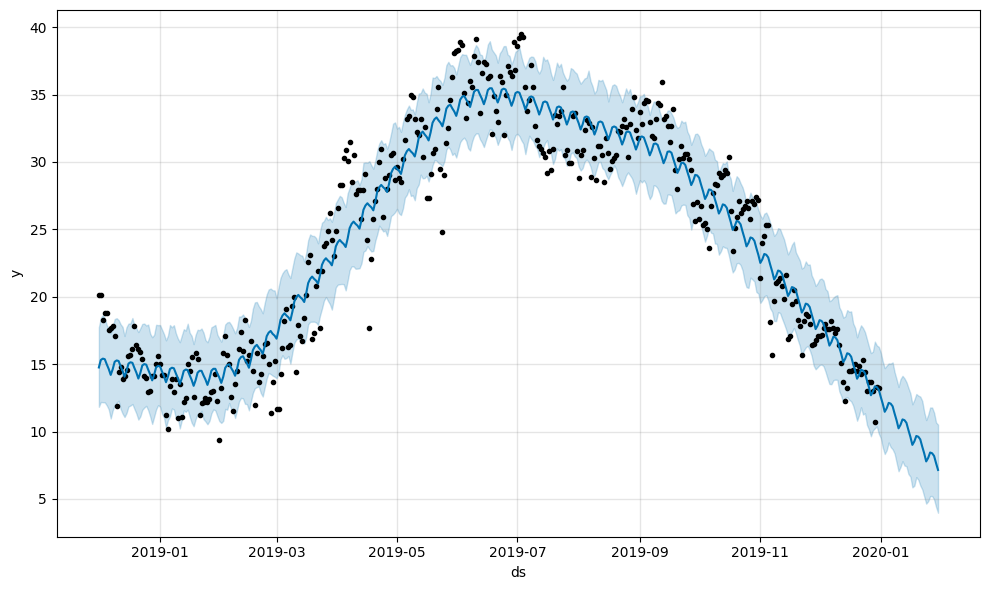

In [ ]:
import pandas as pd
from prophet import Prophet

# Load the data with a different encoding
df = pd.read_csv('/Islamabad Daily Historical Data 2010 2022.csv', delimiter=',', encoding='latin1', on_bad_lines='skip')

# Display the first few rows to inspect the data
print(df.head())

# Display the shape of the dataframe to understand its structure
print(df.shape)

# Display the columns to check for any inconsistencies
print(df.columns)

# Step 2: Prepare the Data
# Rename 'time' to 'ds' and select the 'temperature_2m_max (°C)' column as 'y'
df.rename(columns={'time': 'ds', 'temperature_2m_max (°C)': 'y'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds'])  # Convert the 'ds' column to datetime format

# Check the prepared data
print(df.head())

# Step 3: Fit the Model
m = Prophet()
m.fit(df[['ds', 'y']])

# Step 4: Make a Future DataFrame
future = m.make_future_dataframe(periods=30)  # Forecast for the next 30 days

# Step 5: Predict the Future
forecast = m.predict(future)

# Step 6: Plot the Forecast
fig = m.plot(forecast)
fig.show()

# Save the forecast results to a CSV file
forecast[['ds', 'yhat']].to_csv('/content/2010-2022forecast_results.csv', index=False)

# Print a message to indicate the file has been saved
print("Forecast results have been saved to '/content/2010-2022forecast_results.csv'")



1. Historical Data (Black Dots):
These dots are plotted to show the actual observed values for the time series up to the present day. This allows you to see how well the model's forecast aligns with the past observations.

2. Forecasted Values (Blue Line):
This line represents the predicted values by the Prophet model. It continues from the last point of the historical data into the future for the specified forecast period (30 days in your case).

3. Uncertainty Intervals (Shaded Area):
The shaded area around the blue line represents the 80% and 95% uncertainty intervals by default. These intervals show the range within which the true future values are likely to fall. A wider shaded area indicates greater uncertainty in the predictions.

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuij8egle/wj5z5it1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuij8egle/wipydnui.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29389', 'data', 'file=/tmp/tmpuij8egle/wj5z5it1.json', 'init=/tmp/tmpuij8egle/wipydnui.json', 'output', 'file=/tmp/tmpuij8egle/prophet_model5w8g9opu/prophet_model-20240715063733.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:37:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:37:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


         time  temperature_2m_max (Â°C)  temperature_2m_min (Â°C)  \
0  09/04/2024                      31.6                      17.3   
1  10/04/2024                      28.0                      19.7   
2  11/04/2024                      28.6                      18.7   
3  12/04/2024                      29.5                      18.7   
4  13/04/2024                      23.8                      17.5   

   rain_sum (mm)  
0            0.0  
1            0.0  
2            0.1  
3            0.0  
4           11.5  
(108, 4)
Index(['time', 'temperature_2m_max (Â°C)', 'temperature_2m_min (Â°C)',
       'rain_sum (mm)'],
      dtype='object')
          ds     y  temperature_2m_min (Â°C)  rain_sum (mm)
0 2024-04-09  31.6                      17.3            0.0
1 2024-04-10  28.0                      19.7            0.0
2 2024-04-11  28.6                      18.7            0.1
3 2024-04-12  29.5                      18.7            0.0
4 2024-04-13  23.8                      17.5

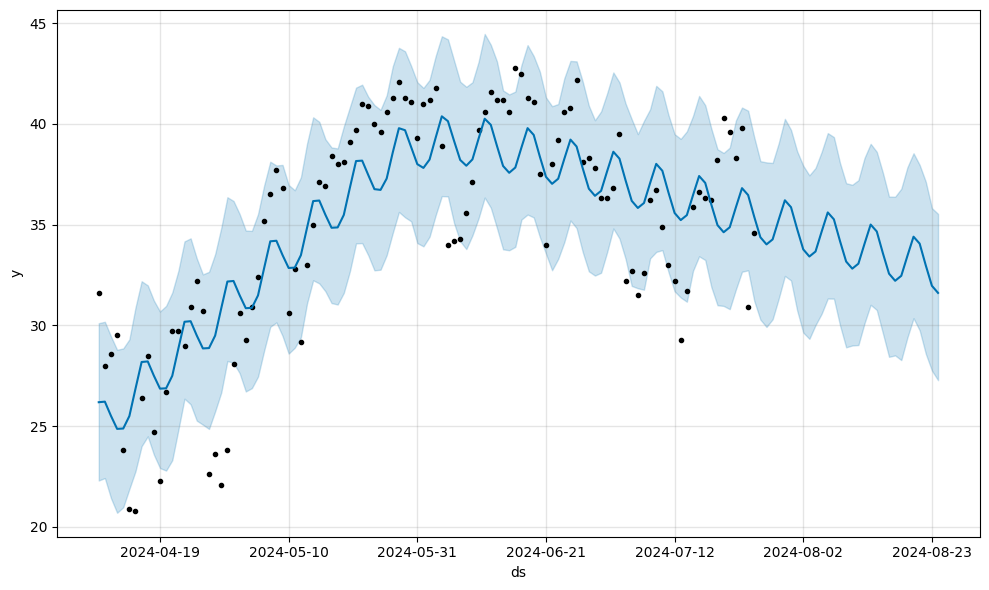

In [ ]:
import pandas as pd
from prophet import Prophet

# Load the data with a different encoding
df = pd.read_csv('/content/8april-22july-open-meteo-33.62N73.12E554m.csv', delimiter=',', encoding='latin1', on_bad_lines='skip')

# Display the first few rows to inspect the data
print(df.head())

# Display the shape of the dataframe to understand its structure
print(df.shape)

# Display the columns to check for any inconsistencies
print(df.columns)

# Step 2: Prepare the Data
# Rename 'time' to 'ds' and select the 'temperature_2m_max (°C)' column as 'y'
df.rename(columns={'time': 'ds', 'temperature_2m_max (Â°C)': 'y'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds'], dayfirst=True)  # Convert the 'ds' column to datetime format with dayfirst=True

# Check the prepared data
print(df.head())

# Step 3: Fit the Model
m = Prophet()
m.fit(df[['ds', 'y']])

# Step 4: Make a Future DataFrame
future = m.make_future_dataframe(periods=30)  # Forecast for the next 30 days

# Step 5: Predict the Future
forecast = m.predict(future)

# Step 6: Plot the Forecast
fig = m.plot(forecast)
fig.show()

# Save the forecast results to a CSV file
forecast[['ds', 'yhat']].to_csv('/content/8april-24augnextforecast_results.csv', index=False)

# Print a message to indicate the file has been saved
print("Forecast results have been saved to '/content/8april-24augnextforecast_results.csv'")


In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from prophet import Prophet

# Assuming the model fitting and prediction code has already been run
# Example of generating a future dataframe for predictions
future = m.make_future_dataframe(periods=7)  # Adjust the periods as needed
forecast = m.predict(future)

# Load actual data from a CSV file
# Ensure the CSV has 'ds' and 'y' columns with the correct date format
df_actual = pd.read_csv('/content/8april-22julynextforecast_results.csv')

# Check the columns in df_actual
print("Columns in df_actual:", df_actual.columns)

# Ensure the date column is correctly formatted
df_actual['ds'] = pd.to_datetime(df_actual['ds'])  # No need to specify the format

# Merge forecast with actuals on 'ds'
df_merged = pd.merge(forecast[['ds', 'yhat']], df_actual[['ds', 'yhat']], on='ds')

# Calculate metrics
mae = mean_absolute_error(df_merged['yhat_y'], df_merged['yhat_x'])
mse = mean_squared_error(df_merged['yhat_y'], df_merged['yhat_x'])
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")




Columns in df_actual: Index(['ds', 'yhat'], dtype='object')
MAE: 5.251837612139871e-16
MSE: 3.402391382518451e-30
RMSE: 1.844557232107058e-15


MAE: 5.251837612139871e-16
MSE: 3.402391382518451e-30
RMSE: 1.844557232107058e-15


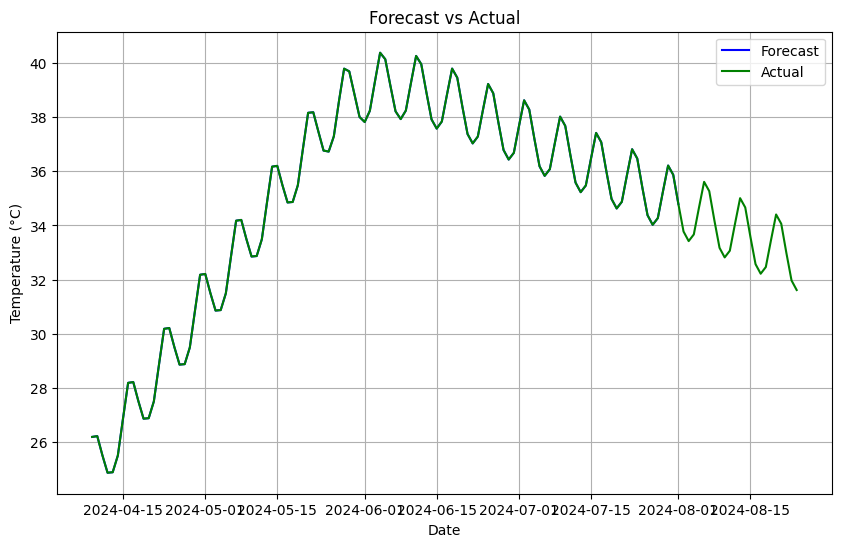

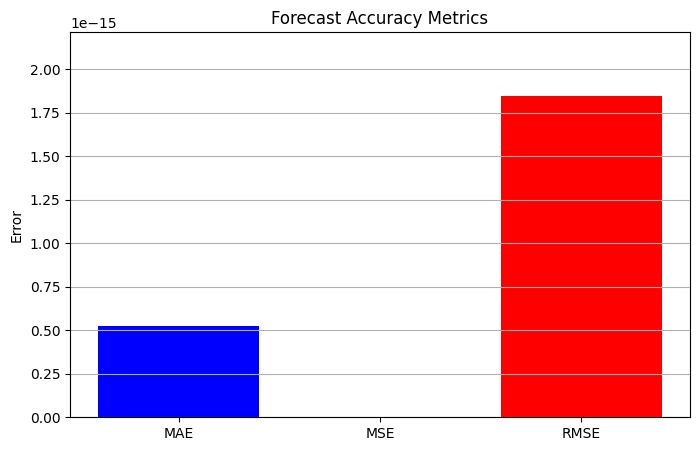

In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from prophet import Prophet

# Assuming the model fitting and prediction code has already been run
# Example of generating a future dataframe for predictions
future = m.make_future_dataframe(periods=7)  # Adjust the periods as needed
forecast = m.predict(future)

# Load actual data from a CSV file
# Ensure the CSV has 'ds' and 'y' columns with the correct date format
df_actual = pd.read_csv('/content/8april-22julynextforecast_results.csv')
df_actual['ds'] = pd.to_datetime(df_actual['ds'])  # Ensure 'ds' is datetime format

# Merge forecast with actuals on 'ds'
df_merged = pd.merge(forecast[['ds', 'yhat']], df_actual[['ds', 'yhat']], on='ds')

# Calculate metrics
mae = mean_absolute_error(df_merged['yhat_y'], df_merged['yhat_x'])
mse = mean_squared_error(df_merged['yhat_y'], df_merged['yhat_x'])
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

# Plotting the forecast and metrics
import matplotlib.pyplot as plt

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='blue')
plt.plot(df_actual['ds'], df_actual['yhat'], label='Actual', color='green')
plt.title('Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

# Plot the metrics
metrics = ['MAE', 'MSE', 'RMSE']
values = [mae, mse, rmse]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['blue', 'green', 'red'])
plt.title('Forecast Accuracy Metrics')
plt.ylabel('Error')
plt.ylim(0, max(values) * 1.2)
plt.grid(axis='y')
plt.show()



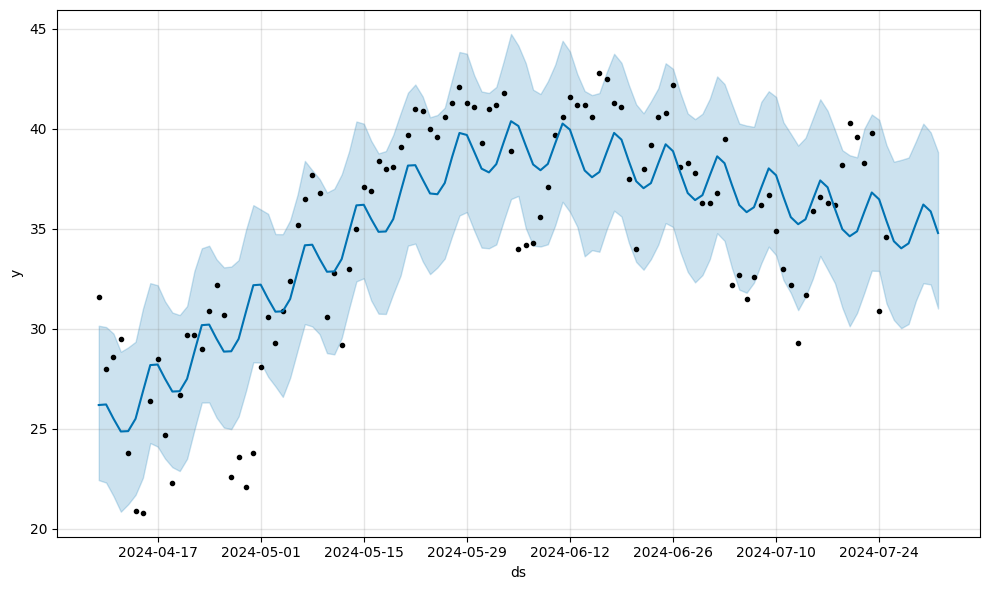

In [ ]:
fig1 = m.plot(forecast)



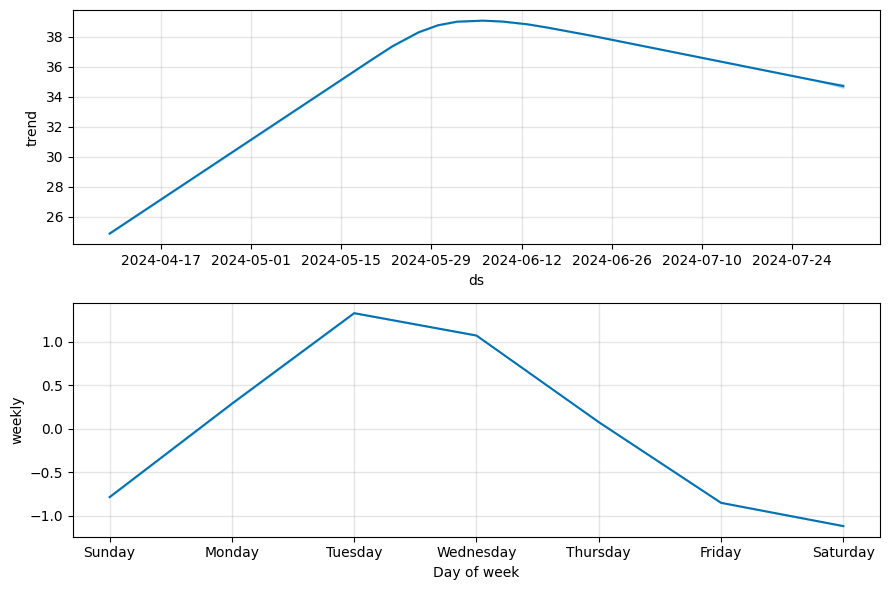

In [ ]:
fig2 = m.plot_components(forecast)



In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [ ]:
plot_components_plotly(m, forecast)



INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp496w48ct/skd8jpw3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp496w48ct/j63rhalh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45253', 'data', 'file=/tmp/tmp496w48ct/skd8jpw3.json', 'init=/tmp/tmp496w48ct/j63rhalh.json', 'output', 'file=/tmp/tmp496w48ct/prophet_model0n4ojmjt/prophet_model-20240723054745.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:47:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:47:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


         time  temperature_2m_max (Â°C)  temperature_2m_min (Â°C)  \
0  09/04/2024                      31.6                      17.3   
1  10/04/2024                      28.0                      19.7   
2  11/04/2024                      28.6                      18.7   
3  12/04/2024                      29.5                      18.7   
4  13/04/2024                      23.8                      17.5   

   rain_sum (mm)  
0            0.0  
1            0.0  
2            0.1  
3            0.0  
4           11.5  
(108, 4)
Index(['time', 'temperature_2m_max (Â°C)', 'temperature_2m_min (Â°C)',
       'rain_sum (mm)'],
      dtype='object')
          ds     y  temperature_2m_min (Â°C)  rain_sum (mm)
0 2024-04-09  31.6                      17.3            0.0
1 2024-04-10  28.0                      19.7            0.0
2 2024-04-11  28.6                      18.7            0.1
3 2024-04-12  29.5                      18.7            0.0
4 2024-04-13  23.8                      17.5

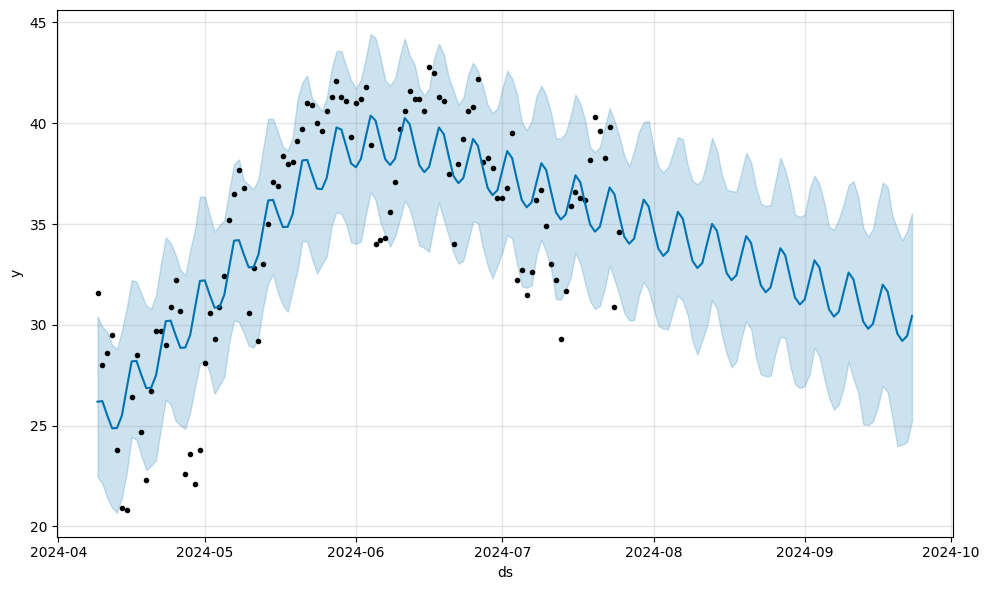

In [ ]:
# prediction till 1 jan 2025 from this code

import pandas as pd
from prophet import Prophet

# Load the data with a different encoding
df = pd.read_csv('/content/8april-22july-open-meteo-33.62N73.12E554m.csv', delimiter=',', encoding='latin1', on_bad_lines='skip')

# Display the first few rows to inspect the data
print(df.head())

# Display the shape of the dataframe to understand its structure
print(df.shape)

# Display the columns to check for any inconsistencies
print(df.columns)

# Step 2: Prepare the Data
# Rename 'time' to 'ds' and select the 'temperature_2m_max (°C)' column as 'y'
df.rename(columns={'time': 'ds', 'temperature_2m_max (Â°C)': 'y'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds'], dayfirst=True)  # Convert the 'ds' column to datetime format with dayfirst=True

# Check the prepared data
print(df.head())

# Step 3: Fit the Model
m = Prophet()
m.fit(df[['ds', 'y']])

# Step 4: Make a Future DataFrame
future = m.make_future_dataframe(periods=60)  # Forecast for the next 30 days

# Step 5: Predict the Future
forecast = m.predict(future)

# Step 6: Plot the Forecast
fig = m.plot(forecast)
fig.show()

# Save the forecast results to a CSV file
forecast[['ds', 'yhat']].to_csv('/content/8april-23sepnextforecast_results.csv', index=False)

# Print a message to indicate the file has been saved
print("Forecast results have been saved to '/content/8april-23sepnextforecast_results.csv'")





INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuij8egle/sw2prbl8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuij8egle/2cmy8i5s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12910', 'data', 'file=/tmp/tmpuij8egle/sw2prbl8.json', 'init=/tmp/tmpuij8egle/2cmy8i5s.json', 'output', 'file=/tmp/tmpuij8egle/prophet_model1v5vqqw4/prophet_model-20240715072123.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:21:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:21:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


         time  temperature_2m_max (Â°C)  temperature_2m_min (Â°C)  \
0  09/04/2024                      31.6                      17.3   
1  10/04/2024                      28.0                      19.7   
2  11/04/2024                      28.6                      18.7   
3  12/04/2024                      29.5                      18.7   
4  13/04/2024                      23.8                      17.5   

   rain_sum (mm)  
0            0.0  
1            0.0  
2            0.1  
3            0.0  
4           11.5  
(108, 4)
Index(['time', 'temperature_2m_max (Â°C)', 'temperature_2m_min (Â°C)',
       'rain_sum (mm)'],
      dtype='object')
          ds     y  temperature_2m_min (Â°C)  rain_sum (mm)
0 2024-04-09  31.6                      17.3            0.0
1 2024-04-10  28.0                      19.7            0.0
2 2024-04-11  28.6                      18.7            0.1
3 2024-04-12  29.5                      18.7            0.0
4 2024-04-13  23.8                      17.5

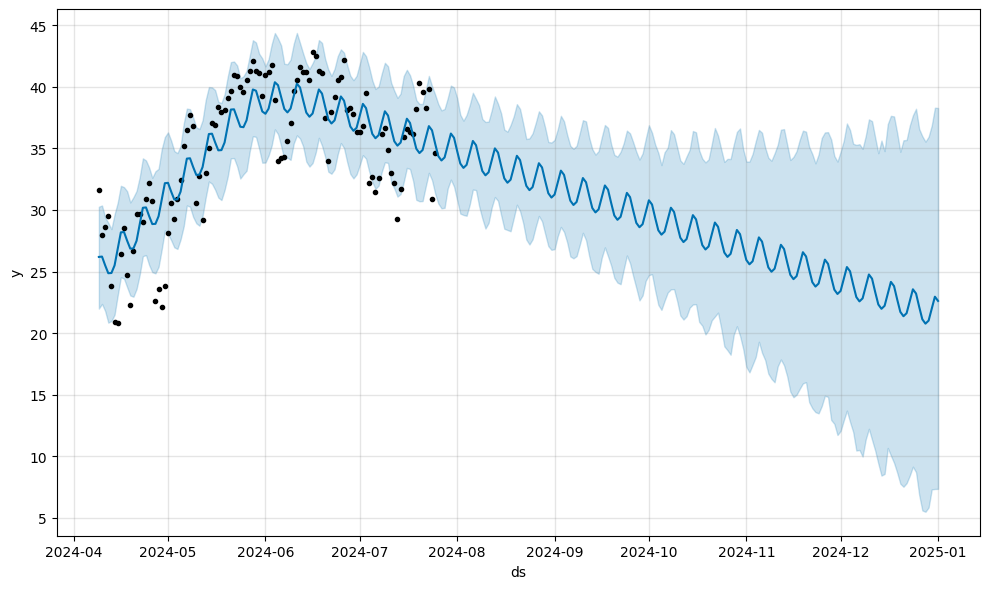

In [ ]:
import pandas as pd
from prophet import Prophet

# Load the data with a different encoding
df = pd.read_csv('/content/8april-22july-open-meteo-33.62N73.12E554m.csv', delimiter=',', encoding='latin1', on_bad_lines='skip')

# Display the first few rows to inspect the data
print(df.head())

# Display the shape of the dataframe to understand its structure
print(df.shape)

# Display the columns to check for any inconsistencies
print(df.columns)

# Step 2: Prepare the Data
# Rename 'time' to 'ds' and select the 'temperature_2m_max (°C)' column as 'y'
df.rename(columns={'time': 'ds', 'temperature_2m_max (Â°C)': 'y'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds'], dayfirst=True)  # Convert the 'ds' column to datetime format with dayfirst=True

# Check the prepared data
print(df.head())

# Step 3: Fit the Model
m = Prophet()
m.fit(df[['ds', 'y']])

# Step 4: Make a Future DataFrame
future = m.make_future_dataframe(periods=160)  # Forecast for the next 30 days

# Step 5: Predict the Future
forecast = m.predict(future)

# Step 6: Plot the Forecast
fig = m.plot(forecast)
fig.show()

# Save the forecast results to a CSV file
forecast[['ds', 'yhat']].to_csv('/content/8april-23octnextforecast_results.csv', index=False)

# Print a message to indicate the file has been saved
print("Forecast results have been saved to '/content/8april-23octnextforecast_results.csv'")

ALL OF THE ABOVE RESULTS ARE FOR TEMPERATURE

In [ ]:
#FOR THE PRECIPITATION

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbc46kdp7/3_6u663x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbc46kdp7/sj6hblcq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48647', 'data', 'file=/tmp/tmpbc46kdp7/3_6u663x.json', 'init=/tmp/tmpbc46kdp7/sj6hblcq.json', 'output', 'file=/tmp/tmpbc46kdp7/prophet_modelazpx_kkn/prophet_model-20240705052051.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
05:20:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:20:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


         time  temperature_2m_max (°C)  temperature_2m_min (°C)  \
0  02/06/2024                     41.0                     25.9   
1  03/06/2024                     41.6                     26.7   
2  04/06/2024                     38.4                     26.2   
3  05/06/2024                     34.2                     24.3   
4  06/06/2024                     35.0                     21.6   

   apparent_temperature_max (°C)  apparent_temperature_min (°C)  \
0                           40.6                           24.5   
1                           42.2                           24.8   
2                           40.6                           25.2   
3                           32.6                           23.3   
4                           36.9                           21.7   

   precipitation_sum (mm)  rain_sum (mm)  precipitation_hours (h)  \
0                     0.0            0.0                        0   
1                     0.0            0.0                

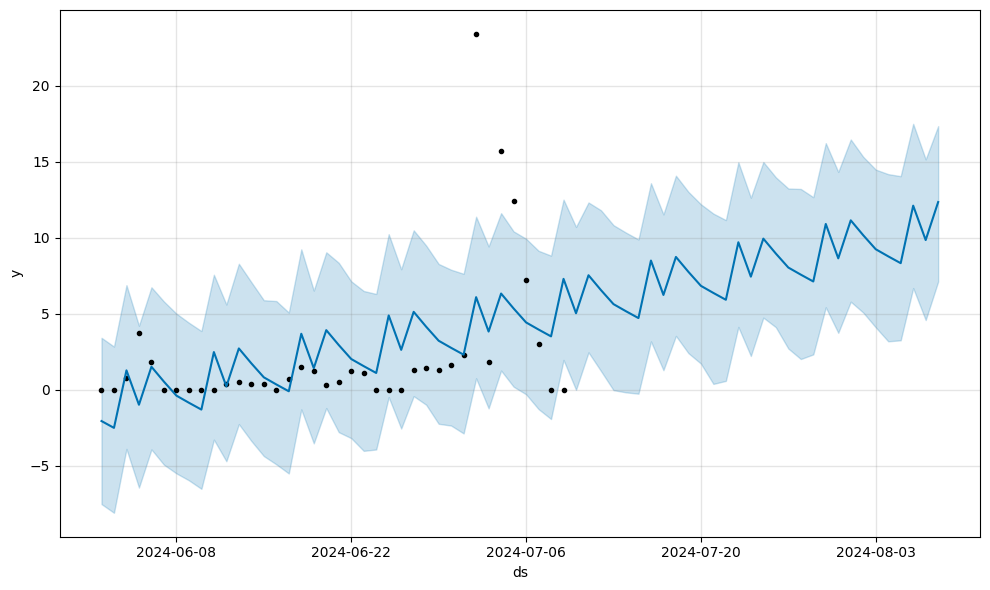

In [ ]:
import pandas as pd
from prophet import Prophet

# Load the data with the correct delimiter
df = pd.read_csv('/content/open-meteo-33.62N73.25E610m.csv', delimiter=',')

# Display the first few rows to inspect the data
print(df.head())

# Display the shape of the dataframe to understand its structure
print(df.shape)

# Display the columns to check for any inconsistencies
print(df.columns)

# Step 2: Prepare the Data
# Rename 'time' to 'ds' and select the 'precipitation_sum (mm)' column as 'y'
df.rename(columns={'time': 'ds', 'precipitation_sum (mm)': 'y'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds'], format='%d/%m/%Y')  # Ensure the date format is correct

# Check the prepared data
print(df.head())

# Step 3: Fit the Model
m = Prophet()
m.fit(df[['ds', 'y']])

# Step 4: Make a Future DataFrame
future = m.make_future_dataframe(periods=30)  # Forecast for the next 30 days

# Step 5: Predict the Future
forecast = m.predict(future)

# Step 6: Plot the Forecast
fig = m.plot(forecast)
fig.show()

# Save the forecast results to a CSV file
forecast[['ds', 'yhat']].to_csv('/content/forecast_results_PRECIPITATION.csv', index=False)

# Print a message to indicate the file has been saved
print("Forecast results have been saved to '/content/forecast_results_PRECIPITATION.csv'")

In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from prophet import Prophet

# Assuming the model fitting and prediction code has already been run
# Example of generating a future dataframe for predictions
future = m.make_future_dataframe(periods=7)  # Adjust the periods as needed
forecast = m.predict(future)

# Load actual data from a CSV file
# Ensure the CSV has 'ds' and 'y' columns with the correct date format
df_actual = pd.read_csv('/content/forecast_results_PRECIPITATION.csv')

# Check the columns in df_actual
print("Columns in df_actual:", df_actual.columns)

# Ensure the date column is correctly formatted
df_actual['ds'] = pd.to_datetime(df_actual['ds'])  # No need to specify the format

# Merge forecast with actuals on 'ds'
df_merged = pd.merge(forecast[['ds', 'yhat']], df_actual[['ds', 'yhat']], on='ds')

# Calculate metrics
mae = mean_absolute_error(df_merged['yhat_y'], df_merged['yhat_x'])
mse = mean_squared_error(df_merged['yhat_y'], df_merged['yhat_x'])
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

Columns in df_actual: Index(['ds', 'yhat'], dtype='object')
MAE: 1.1133069774713375e-16
MSE: 7.46447648001284e-32
RMSE: 2.732119411741156e-16


MAE: 33.729723060218696
MSE: 1167.769649481037
RMSE: 34.172644753970054


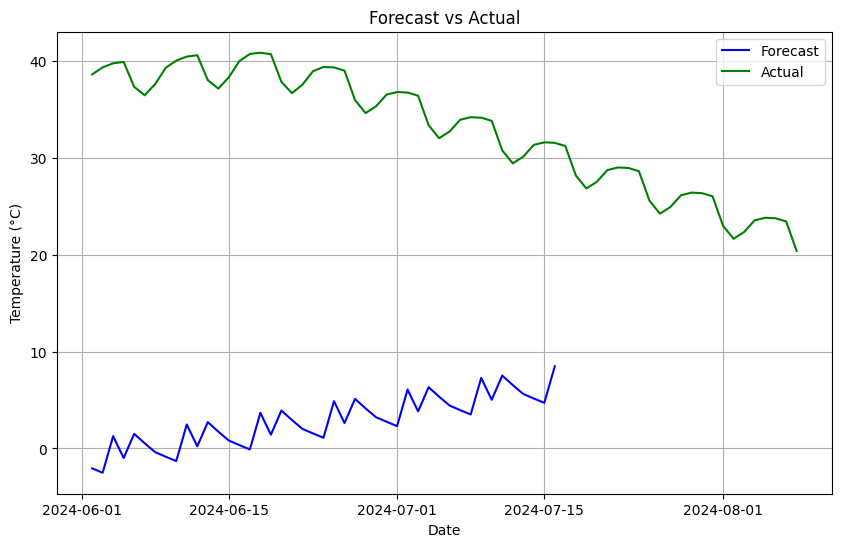

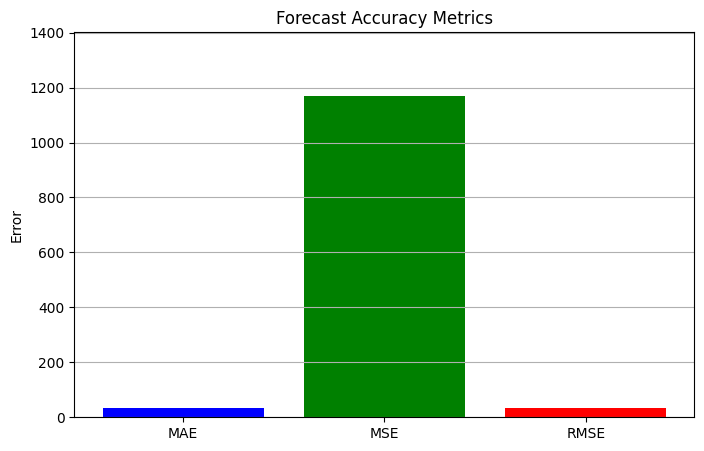

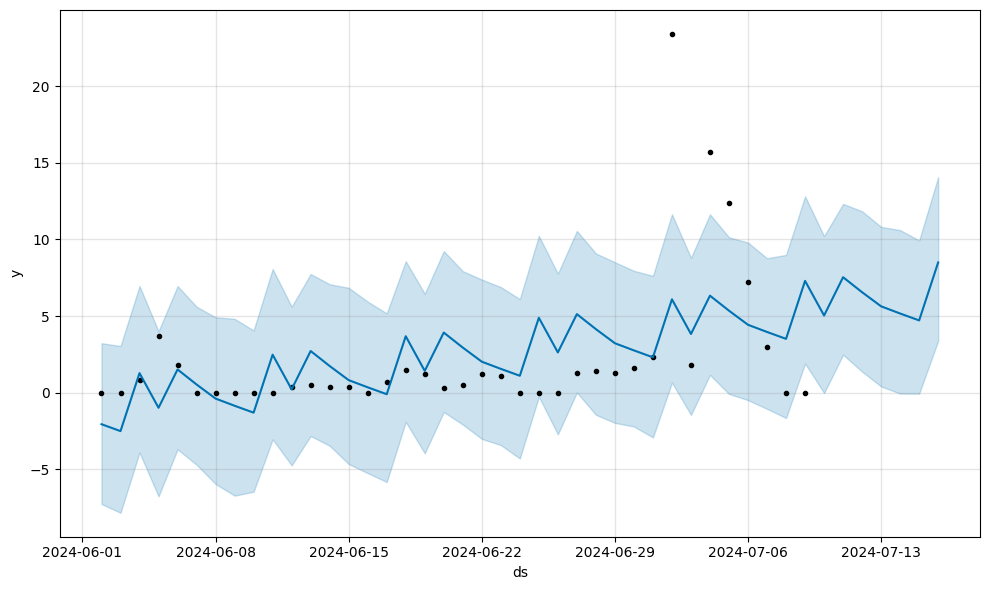

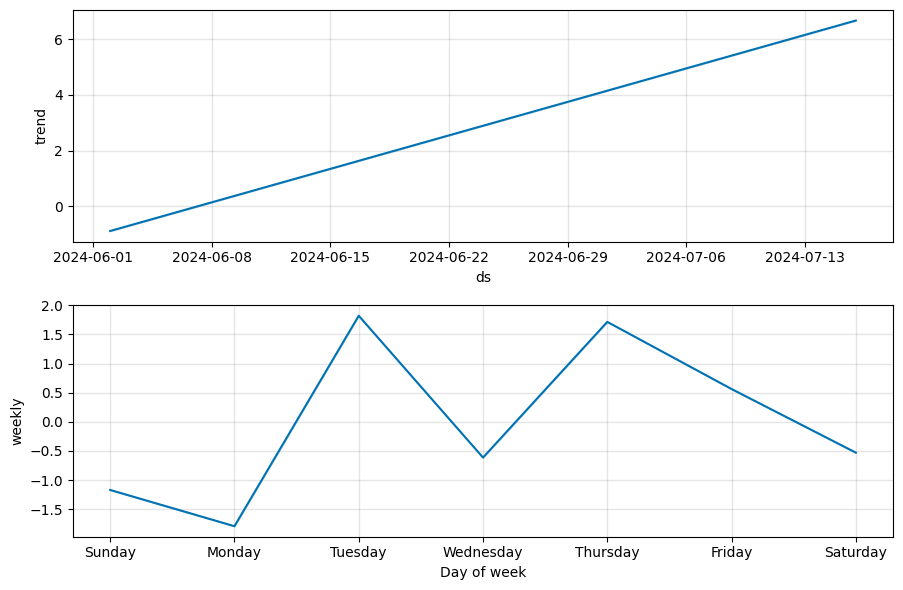

In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from prophet import Prophet

# Assuming the model fitting and prediction code has already been run
# Example of generating a future dataframe for predictions
future = m.make_future_dataframe(periods=7)  # Adjust the periods as needed
forecast = m.predict(future)

# Load actual data from a CSV file
# Ensure the CSV has 'ds' and 'y' columns with the correct date format
df_actual = pd.read_csv('/content/forecast_results.csv')
df_actual['ds'] = pd.to_datetime(df_actual['ds'])  # Ensure 'ds' is datetime format

# Merge forecast with actuals on 'ds'
df_merged = pd.merge(forecast[['ds', 'yhat']], df_actual[['ds', 'yhat']], on='ds')

# Calculate metrics
mae = mean_absolute_error(df_merged['yhat_y'], df_merged['yhat_x'])
mse = mean_squared_error(df_merged['yhat_y'], df_merged['yhat_x'])
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

# Plotting the forecast and metrics
import matplotlib.pyplot as plt

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='blue')
plt.plot(df_actual['ds'], df_actual['yhat'], label='Actual', color='green')
plt.title('Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

# Plot the metrics
metrics = ['MAE', 'MSE', 'RMSE']
values = [mae, mse, rmse]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['blue', 'green', 'red'])
plt.title('Forecast Accuracy Metrics')
plt.ylabel('Error')
plt.ylim(0, max(values) * 1.2)
plt.grid(axis='y')
plt.show()


fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)


plot_components_plotly(m, forecast)

ALL OF THE ABOVE RESULTS ARE FOR PRICIPITATION